<a href="https://colab.research.google.com/github/drishyatv/Online-Shopper-Purchase-Intention-Prediction/blob/main/project_onlineshopping_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Step 1: Import libraries and load the dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
#  Load the Dataset
file_path = r"C:\Users\ANJ\Downloads\online+shoppers+purchasing+intention+dataset (1)\online_shoppers_intention.csv"
df = pd.read_csv(file_path)


✅ Step 2: EDA (Exploratory Data Analysis)

In [ ]:
df.shape

(12330, 18)

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
df.info() #understand the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# summary statistics

df.describe() #Numeric summary


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.describe(include='object') #Categorical summary

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


<Axes: xlabel='Revenue'>

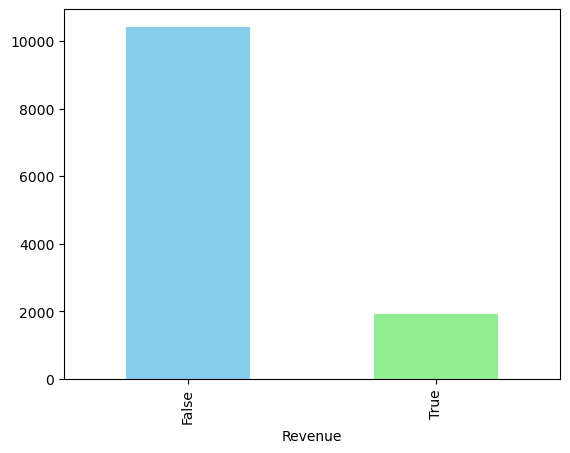

In [ ]:
df['Revenue'].value_counts() #Target variable distribution

df['Revenue'].value_counts().plot(kind='bar',color=['skyblue','lightgreen'])


In [ ]:
# check for missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.duplicated().sum()

125

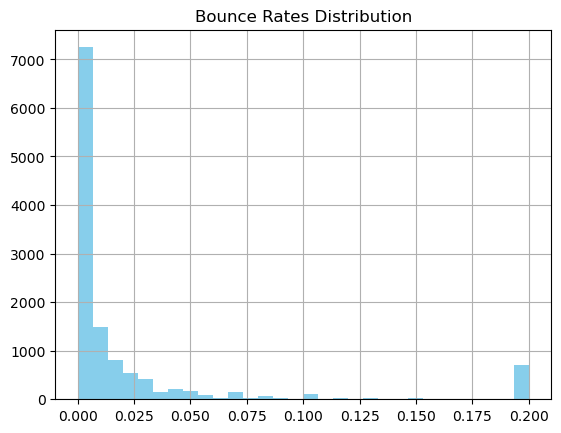

In [ ]:
# Univariate  Analysis

df['BounceRates'].hist(bins=30,color='skyblue') #histogram for a numerical column
plt.title('Bounce Rates Distribution')
plt.show()


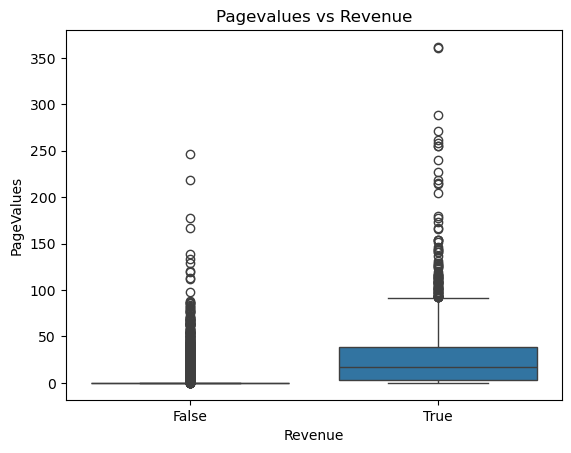

,PageValues,BounceRates,ExitRates
Revenue,,,
False,1.975998,0.025317,0.047378
True,27.264518,0.005117,0.019555


In [ ]:
# Bivariate Analysis

# Boxlot to compare Pagevalues by Revenue

sns.boxplot(x='Revenue',y='PageValues',data=df)
plt.title('Pagevalues vs Revenue')
plt.show()

# Group mean by Revenue
df.groupby('Revenue')[['PageValues','BounceRates','ExitRates']].mean()

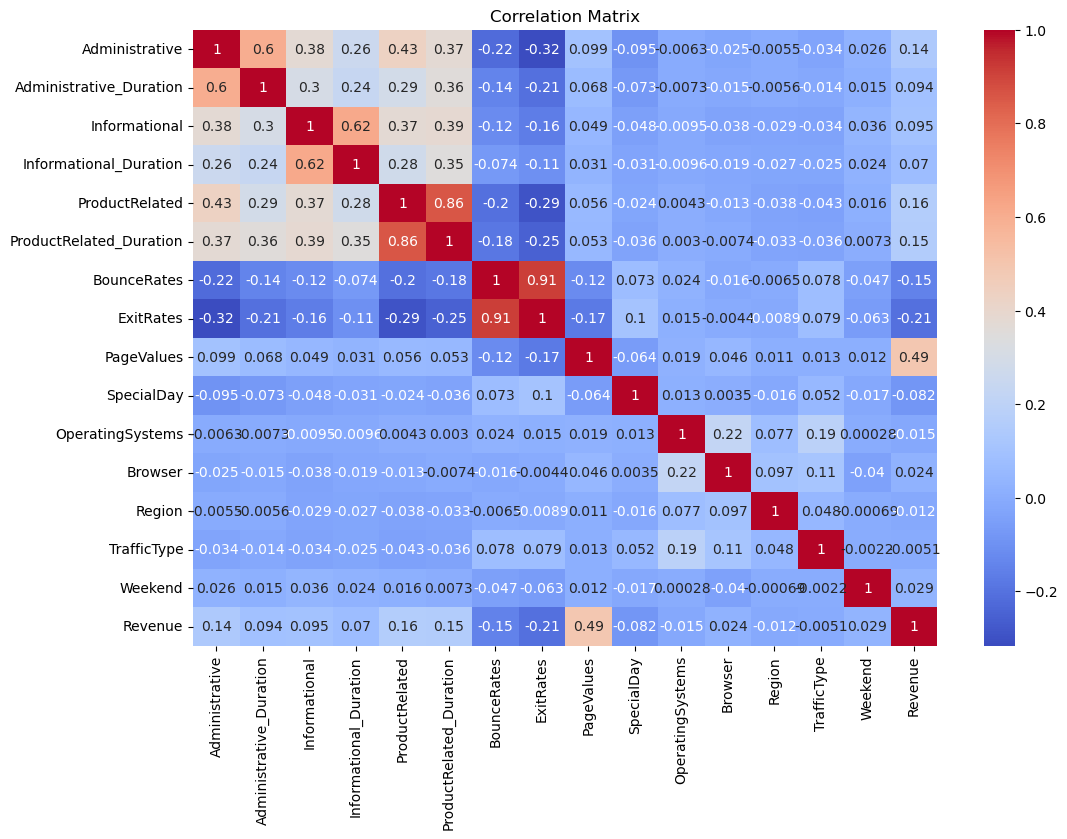

In [ ]:
# correlation matrix

correlation = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

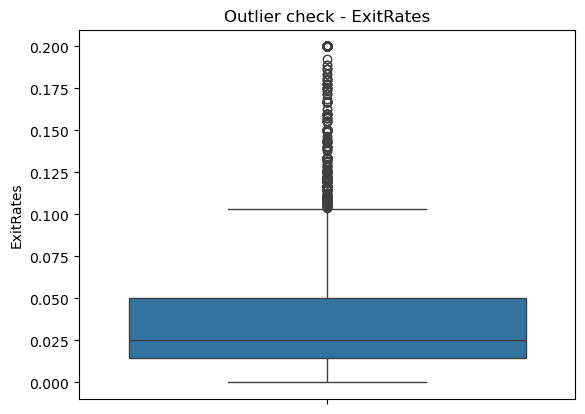

In [ ]:
#Outlier Detection

#Boxplot for ExitRates
sns.boxplot(data=df['ExitRates'])
plt.title('Outlier check - ExitRates')
plt.show()

C:\Users\ANJ\AppData\Local\Temp\ipykernel_9312\59438070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue',data=df , palette='Set2', legend=False)


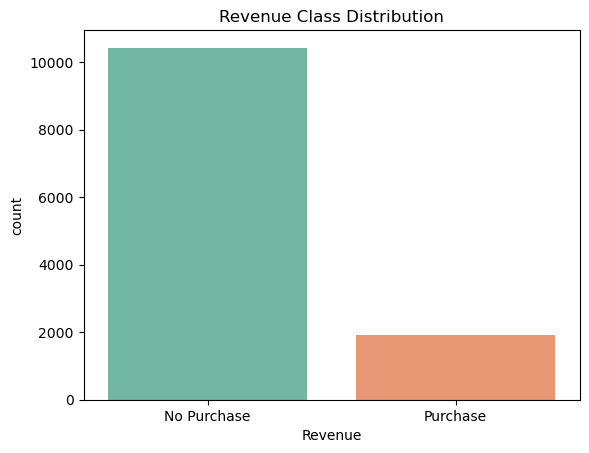

In [ ]:
#Target Variable Visuaization

#countplot
sns.countplot(x='Revenue',data=df , palette='Set2', legend=False)
plt.title('Revenue Class Distribution')
plt.xticks([0,1],['No Purchase','Purchase'])
plt.show()

✅ Step 3: Outlier handling using IQR

In [ ]:

import numpy as np

def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap the outliers (instead of removing)
    data[column] = np.where(data[column] < lower, lower,
                            np.where(data[column] > upper, upper, data[column]))
    return data

# Apply to selected numerical columns
num_cols = ['Administrative_Duration', 'Informational_Duration',
            'ProductRelated_Duration', 'BounceRates',
            'ExitRates', 'PageValues']

for col in num_cols:
    df = handle_outliers_iqr(df, col)

print("✅ Outliers handled using IQR")


✅ Outliers handled using IQR


✅ Step 4: Data Preprocessing

In [ ]:
#Encode categorical columns
le=LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue']=df['Revenue'].astype(int)  #target variable



In [ ]:
#Feature scaling

scaler = StandardScaler()

num_cols = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
df[num_cols] = scaler.fit_transform(df[num_cols])

✅ Step 5: Train-Test Split

In [ ]:
#Train-Test split

x = df.drop('Revenue', axis=1)
y = df['Revenue']

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

✅Step 6: Model Building & Evaluation

Logistic Regression
Accuracy: 0.8690186536901865
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.73      0.34      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



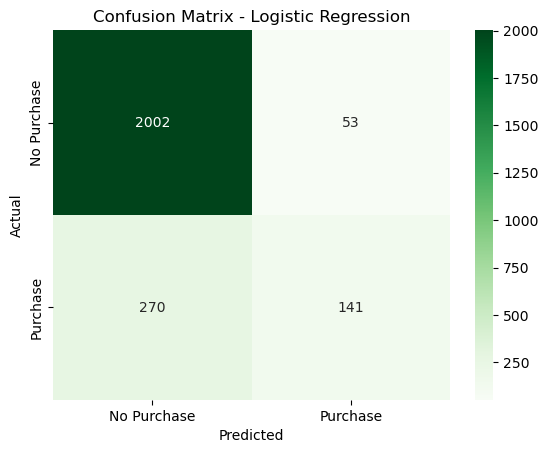

In [ ]:

#Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_test)
log_cm = confusion_matrix(y_test,log_pred)

print("Logistic Regression")
print("Accuracy:",accuracy_score(y_test, log_pred))
print("Classification Report:\n",classification_report(y_test, log_pred))


#plot
sns.heatmap(log_cm, annot=True,fmt='d', cmap='Greens',xticklabels=['No Purchase','Purchase'],yticklabels=['No Purchase','Purchase'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 Random Forest
Accuracy: 0.8957826439578265
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



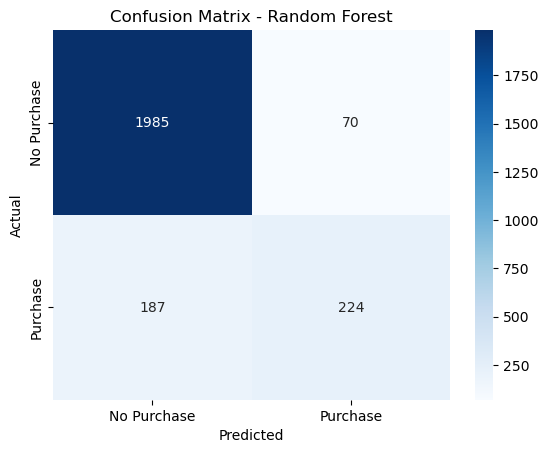

In [ ]:
#Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

print("\n Random Forest")
print("Accuracy:", accuracy_score(y_test,rf_pred))
print("Classification Report:\n", classification_report(y_test,rf_pred))
rf_cm = confusion_matrix(y_test,rf_pred)

#plot
sns.heatmap(rf_cm, annot=True,fmt='d',cmap='Blues',xticklabels=['No Purchase','Purchase'],yticklabels=['No Purchase','Purchase'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\ANJ\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:13:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 XGBoost
Accuracy: 0.8880778588807786
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2055
           1       0.71      0.56      0.62       411

    accuracy                           0.89      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.88      0.89      0.88      2466



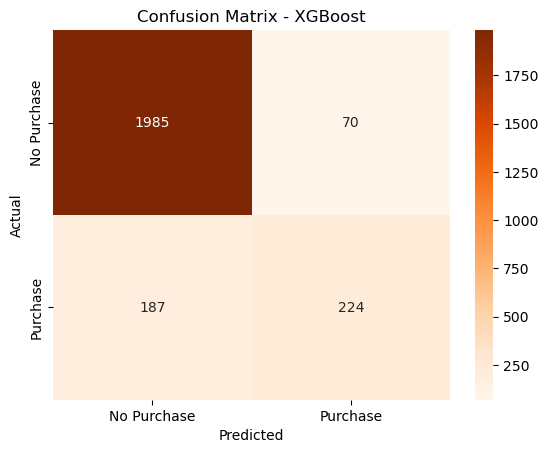

In [ ]:
#XGBoost

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

print("\n XGBoost")
print("Accuracy:", accuracy_score(y_test , xgb_pred))
print("Classification Report:\n", classification_report(y_test,xgb_pred))
xgb_cm = confusion_matrix(y_test,rf_pred)

#plot
sns.heatmap(xgb_cm, annot=True,fmt='d',cmap='Oranges',xticklabels=['No Purchase','Purchase'],yticklabels=['No Purchase','Purchase'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Final Conclusion:

Random forest and XGBoost are the best models for predicting Online shopper purchase intention with highest F1 score and accuracy.
